In [ ]:
import pandas as pd
import numpy as np
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file into a pandas DataFrame
df = pd.read_csv('/content/hotel_data_final.csv')

# Display the first 5 rows of the DataFrame
display(df.head())

,Final Price,Max People,Area_m2,price_per_m2,m2_per_person,num_facilities,has_luxury_keyword,room_class,is_king,is_queen,...,is_sofa,has_wifi,has_ac,has_breakfast,has_tv,has_pool,has_balcony,has_parking,has_kitchen,has_fridge
0,0.058457,0.571429,0.205882,0.036569,0.041096,0.500000,0,3,0,0,...,0,0,1,0,0,0,1,0,0,0
1,0.055120,0.142857,0.176471,0.038384,0.109589,0.500000,0,3,0,0,...,0,0,1,0,1,0,0,0,0,0
2,0.028801,0.285714,0.264706,0.015215,0.095890,0.794118,0,3,0,0,...,0,1,1,0,1,0,1,0,0,0
3,0.027936,0.142857,0.382353,0.011002,0.205479,0.441176,0,3,1,0,...,0,0,1,0,1,0,0,0,1,1
4,0.065889,0.142857,0.382353,0.025599,0.205479,0.882353,0,3,0,0,...,0,1,1,0,1,0,1,0,1,1


**Phân bố nhãn (Room Class Distribution)**

Kiểm tra phân bố nhãn

Phát hiện class imbalance trước khi train model

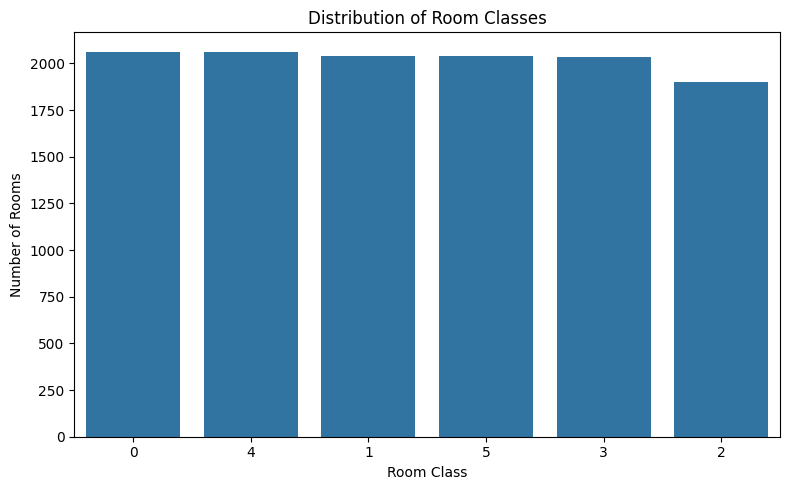

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='room_class', order=df['room_class'].value_counts().index)

plt.title('Distribution of Room Classes')
plt.xlabel('Room Class')
plt.ylabel('Number of Rooms')
plt.tight_layout()
plt.show()

**Boxplot diện tích phòng (Area_m2)**

Phát hiện outliers về diện tích

Đánh giá độ phân tán của dữ liệu vật lý

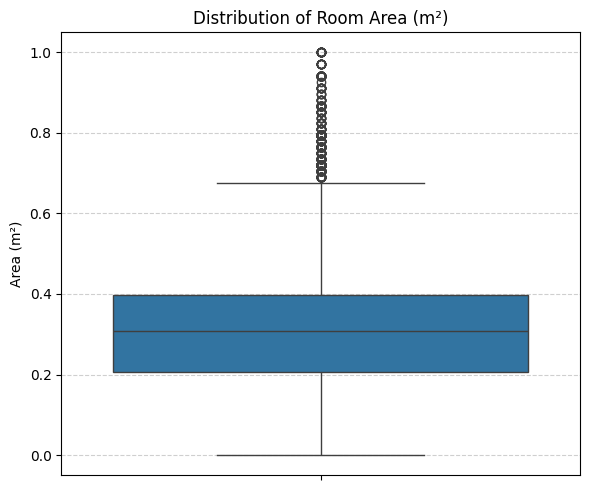

In [ ]:
plt.figure(figsize=(6, 5))
sns.boxplot(y=df['Area_m2'])

plt.title('Distribution of Room Area (m²)')
plt.ylabel('Area (m²)')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

**Diện tích theo hạng phòng**

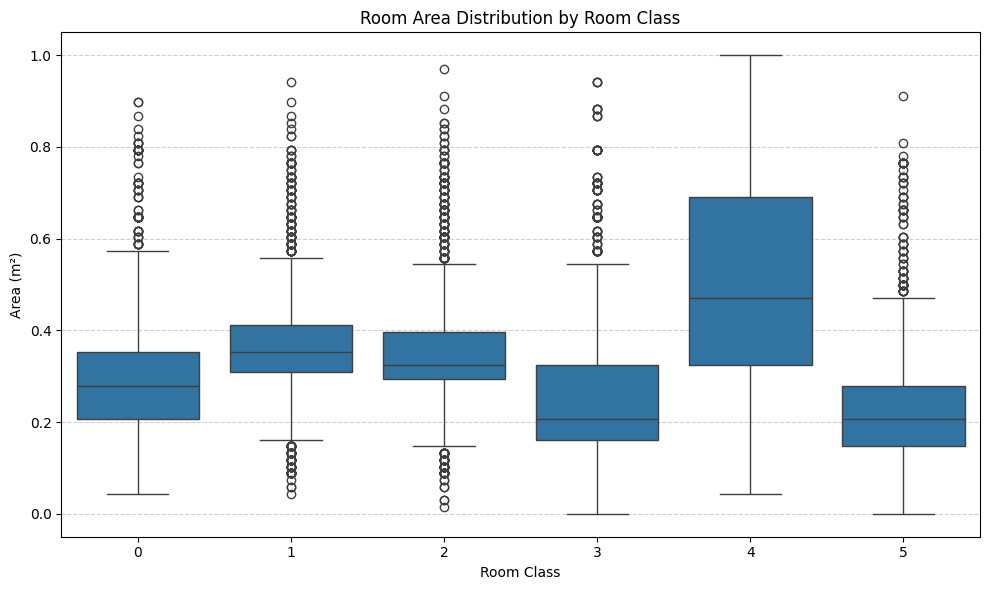

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='room_class', y='Area_m2')

plt.title('Room Area Distribution by Room Class')
plt.xlabel('Room Class')
plt.ylabel('Area (m²)')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

Quan hệ Giá và Diện tích

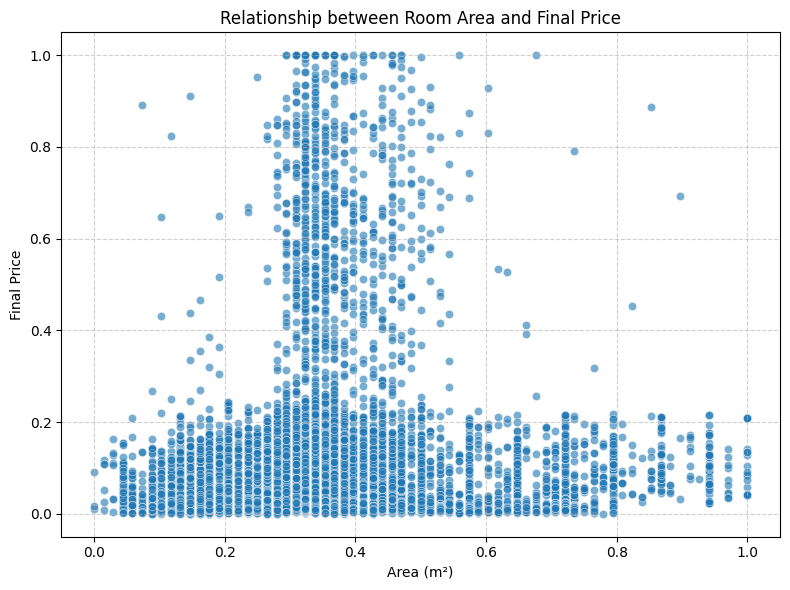

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df,
    x='Area_m2',
    y='Final Price',
    alpha=0.6
)

plt.title('Relationship between Room Area and Final Price')
plt.xlabel('Area (m²)')
plt.ylabel('Final Price')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

**Phân bố các feature dẫn xuất**

Kiểm tra độ phân bố feature engineering

Xem có cần scaling / clipping hay không

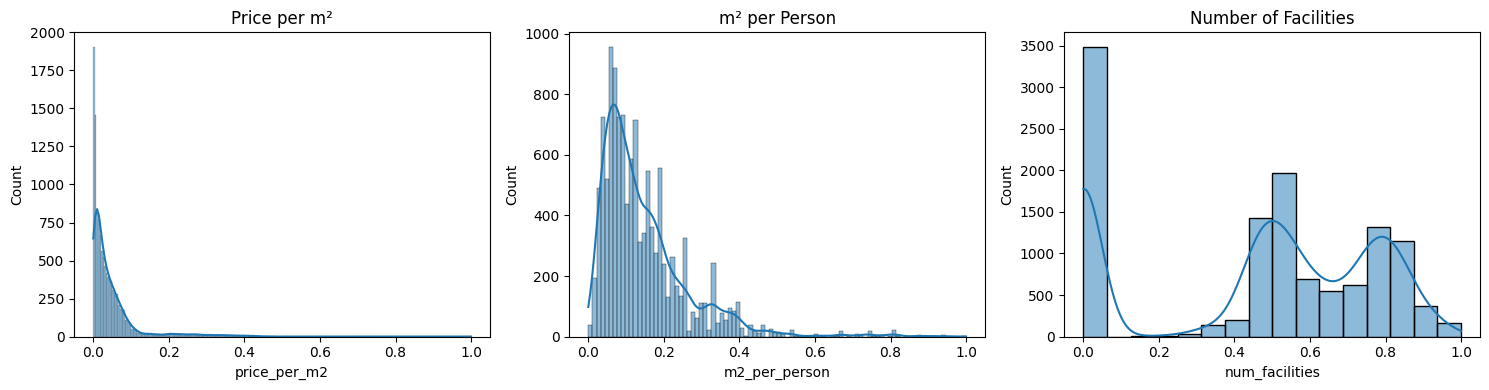

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

sns.histplot(df['price_per_m2'], kde=True, ax=axes[0])
axes[0].set_title('Price per m²')

sns.histplot(df['m2_per_person'], kde=True, ax=axes[1])
axes[1].set_title('m² per Person')

sns.histplot(df['num_facilities'], kde=True, ax=axes[2])
axes[2].set_title('Number of Facilities')

plt.tight_layout()
plt.show()

**Correlation Heatmap**

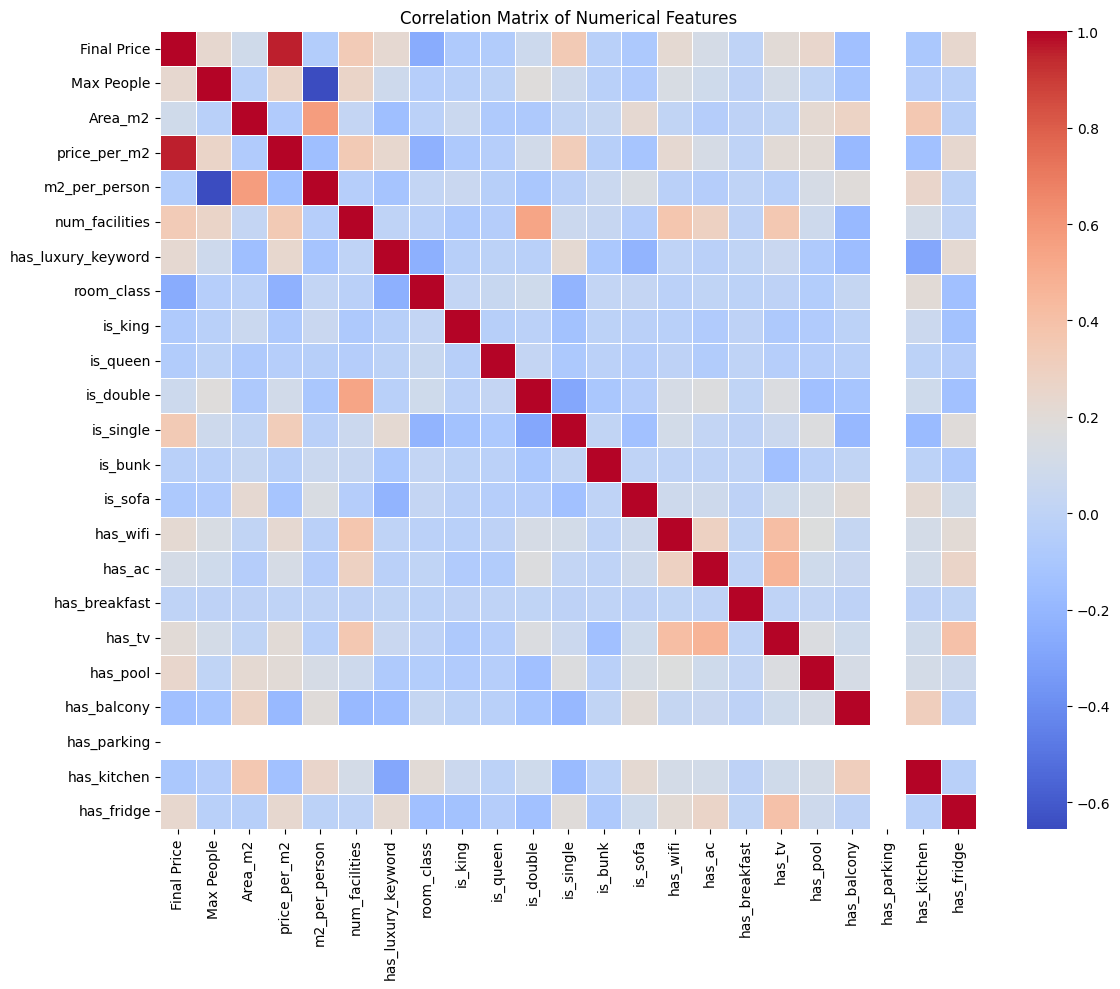

In [ ]:
numerical_df = df.select_dtypes(include=['number'])

plt.figure(figsize=(12, 10))
sns.heatmap(
    numerical_df.corr(),
    annot=False,
    cmap='coolwarm',
    linewidths=0.5
)

plt.title('Correlation Matrix of Numerical Features')
plt.tight_layout()
plt.show()

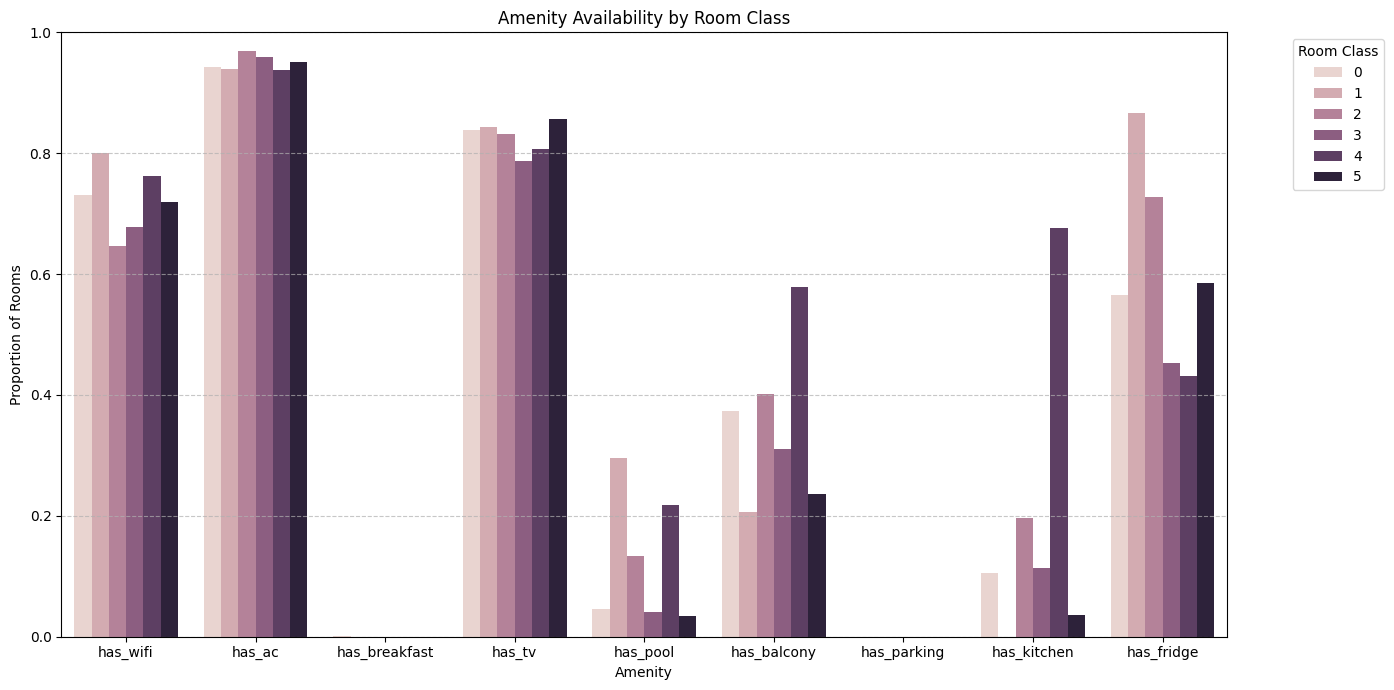

In [ ]:
amenity_cols = [
    'has_wifi', 'has_ac', 'has_breakfast', 'has_tv',
    'has_pool', 'has_balcony', 'has_parking',
    'has_kitchen', 'has_fridge'
]

amenity_by_class = (
    df
    .groupby('room_class')[amenity_cols]
    .mean()
    .reset_index()
)

amenity_by_class
amenity_melted = amenity_by_class.melt(
    id_vars='room_class',
    value_vars=amenity_cols,
    var_name='Amenity',
    value_name='Proportion'
)
plt.figure(figsize=(14, 7))
sns.barplot(
    data=amenity_melted,
    x='Amenity',
    y='Proportion',
    hue='room_class'
)

plt.title('Amenity Availability by Room Class')
plt.xlabel('Amenity')
plt.ylabel('Proportion of Rooms')
plt.ylim(0, 1)
plt.legend(title='Room Class', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

